In [ ]:
import numpy as np
import pandas as pd

### Object creation

Creating a `Series` by passing a list of values, letting pandas create a default RangeIndex

In [ ]:
s = pd.Series([1, 2, 5, np.nan, 6, 8])
s

In [ ]:
pd.Series(np.arange(3), index=list('ABC'))

Creating a DataFrame by passing a NumPy array with datetime index using `date_range()` and labeled columns:

In [ ]:
dates = pd.date_range('20130101', periods=6)
dates

In [ ]:
np.random.randn(6, 4)

In [ ]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

Creating a DataFrame by passing a dictionary of objects where keys are the column labels and the values are column values.

In [ ]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp('20130101'),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo"
    }
)
df2

### Viewing data

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.tail(3)

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
df.to_numpy()

`describe()` shows a quick statistic summary of your data

In [ ]:
df.describe()

In [ ]:
df2.describe()

Trasposing your data

In [ ]:
df.T

In [ ]:
# sorts by an axis
df.sort_index(axis=1, ascending=False)

In [ ]:
# sorts by values
df.sort_values(by="B")

# Selection

### Getitem(`[]`)

For a `DataFrame`, passing a single label selects a columns and yields `Series` equivalent to `df.A`:

In [ ]:
df['A']

passing a slice `:` selects matching rows

In [ ]:
df[0:3]

### Selection by label

Selectin a row matching a label:

In [ ]:
df.loc[dates[0]]

Select all rows (`:`) with a select column labels

In [ ]:

df.loc[:, ["A", "B"]]

For label slicing, both endpoints are *included*:

In [ ]:
df.loc['20130101':'20130104', ['A', 'B']]

Selecting a single row and column label returns a scaler

In [ ]:
df.loc[dates[0], 'A']

### Selection by position

Select via the position of the passed integers:

In [ ]:
df.iloc[3]

Integer slices act similar to NumPy/Python:

In [ ]:
df.iloc[3:5, 0:2]

Lists of integer position locations:

In [ ]:
df.iloc[[1, 2, 4], [0, 2]]

For slicing rows explicitly:

In [ ]:
df.iloc[1:3, :]

For slicing columns explicitly:

In [ ]:
df.iloc[:, 1:3]

For getting a value explicitly:

In [ ]:
df.iloc[1, 1]

For getting fast access to a scalar (equivalent to the prior method):

In [ ]:
df.iat[1, 1]

### Boolean indexing

Select rows where `df.A` is greater than `0`:

In [ ]:
df[df["A"] > 0]

Select values from a `DataFrame` where a boolean condition is met:

In [ ]:
df[df > 0]

Using `isin()` method for filtering:

In [ ]:
df2 = df.copy()

In [ ]:
df2["E"] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

In [ ]:
df2[df2['E'].isin(['two', 'four'])]

### Setting

Setting a new column automatically aligns the data by the indexes:

In [ ]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

In [ ]:
df['F'] = s1

In [ ]:
df

Setting values by label:

In [ ]:
df.at[dates[0], "A"] = 0
df

Setting values by position:

In [ ]:
df.iat[0, 1] = 0
df

Setting by assigning with a NumPy array:

In [ ]:
df.loc[:, "D"] = np.array([5] * len(df))

In [ ]:
df

A `where` operation with setting:

In [ ]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

### Missing data

For NumPy data types, `np.nan` represents missing data. It is by default not included in computations.

Reindeing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

`DataFrame.dropna()` drop any rows that have missing data:

In [ ]:
df1.dropna(how='any')

`DataFrame.fillna()` filss missing data:

In [ ]:
df1.fillna(value=5)

`isna()` gets the boolean mask where values are `nan`:

In [ ]:
pd.isna(df1)

# Operations

### Stats

Operations in general *exclude* missing data.

Calculate the mean value for each column:

In [ ]:
df.mean()

Calculate the mean value for each row:

In [ ]:
df.mean(axis=1)

Operating with another `Series` or `DataFrame` with a different column will align with the union of the index or column labels. In addition, pandas automatically broadcasts along the specified dimensions and will fill unaligned labels with `np.nan`.

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

In [ ]:
df.sub(s, axis='index')

### User defined functions

`DataFrame.agg()` and `DataFrame.transform()` applies a user defined function that reduces or broadcasts its result respectively.

In [ ]:
df.agg(lambda x: np.mean(x) * 5.6)

In [ ]:
df.transform(lambda x: x * 101.2)

### Values Counts

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

### String Methods

`Series` is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snipped below.

In [ ]:
s = pd.Series(['A', 'B', 'C', 'D', "Aaba", "Baca", np.nan, 'CABA', 'dot', 'cat'])
s.str.lower()

# Merge

### Concat

pandas provides various facilities for easily combining together `Series` and `DataFrame` objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

In [113]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.532305,0.679220,-0.294025,1.644627
1,-0.064995,0.453976,0.408908,-0.670672
2,0.491392,-0.634405,1.694994,-0.714662
3,-0.364403,-1.056874,0.815588,-1.573473
4,0.714922,-0.013352,-0.293506,0.293319
5,0.866478,-0.043590,1.813296,-0.910702
6,0.647805,0.712598,-1.148117,-0.394101
7,0.123316,0.748357,1.923756,1.649685
8,1.701407,0.874029,0.324373,0.138436
9,1.245650,-0.395976,-1.204795,-1.209868


In [115]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.532305  0.679220 -0.294025  1.644627
 1 -0.064995  0.453976  0.408908 -0.670672
 2  0.491392 -0.634405  1.694994 -0.714662,
           0         1         2         3
 3 -0.364403 -1.056874  0.815588 -1.573473
 4  0.714922 -0.013352 -0.293506  0.293319
 5  0.866478 -0.043590  1.813296 -0.910702
 6  0.647805  0.712598 -1.148117 -0.394101,
           0         1         2         3
 7  0.123316  0.748357  1.923756  1.649685
 8  1.701407  0.874029  0.324373  0.138436
 9  1.245650 -0.395976 -1.204795 -1.209868]

In [116]:
pd.concat(pieces)

,0,1,2,3
0,-0.532305,0.679220,-0.294025,1.644627
1,-0.064995,0.453976,0.408908,-0.670672
2,0.491392,-0.634405,1.694994,-0.714662
3,-0.364403,-1.056874,0.815588,-1.573473
4,0.714922,-0.013352,-0.293506,0.293319
5,0.866478,-0.043590,1.813296,-0.910702
6,0.647805,0.712598,-1.148117,-0.394101
7,0.123316,0.748357,1.923756,1.649685
8,1.701407,0.874029,0.324373,0.138436
9,1.245650,-0.395976,-1.204795,-1.209868


##### Join

In [118]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [119]:
left

,key,lval
0,foo,1
1,foo,2


In [120]:
right

,key,rval
0,foo,4
1,foo,5


In [121]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [ ]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [122]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


# Grouping

In [123]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,0.535602,-1.740696
1,bar,one,-1.966705,-0.642469
2,foo,two,0.085369,0.029468
3,bar,three,1.228182,0.896031
4,foo,two,-0.311460,-3.129826
5,bar,two,-0.184623,1.622966
6,foo,one,2.377653,0.262874
7,foo,three,-0.611086,0.486119


In [126]:
df.groupby("A")[['C', 'D']].sum()

,C,D
A,,
bar,-0.923146,1.876527
foo,2.076079,-4.092061


In [127]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -1.966705 -0.642469
    three  1.228182  0.896031
    two   -0.184623  1.622966
foo one    2.913255 -1.477822
    three -0.611086  0.486119
    two   -0.226090 -3.100358

# Reshaping

### Stack

In [128]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']
]

In [133]:
index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     0.314335  0.438919
      two     0.327958  1.717589
baz   one     2.132721 -0.669446
      two     0.354722  2.701108
foo   one     0.332484  0.941697
      two     0.302564 -1.069339
qux   one    -1.058655  0.870887
      two     0.836091  0.092006

In [134]:
df2 = df[:4]

In [135]:
df2

A         B
first second                    
bar   one     0.314335  0.438919
      two     0.327958  1.717589
baz   one     2.132721 -0.669446
      two     0.354722  2.701108

In [138]:
stacked = df2.stack(future_stack=True)
stacked

first  second   
bar    one     A    0.314335
               B    0.438919
       two     A    0.327958
               B    1.717589
baz    one     A    2.132721
               B   -0.669446
       two     A    0.354722
               B    2.701108
dtype: float64

In [139]:
stacked.unstack()

A         B
first second                    
bar   one     0.314335  0.438919
      two     0.327958  1.717589
baz   one     2.132721 -0.669446
      two     0.354722  2.701108

In [140]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.314335  0.327958
      B  0.438919  1.717589
baz   A  2.132721  0.354722
      B -0.669446  2.701108

In [141]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.314335  2.132721
       B  0.438919 -0.669446
two    A  0.327958  0.354722
       B  1.717589  2.701108

# Pivot tables

In [142]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-0.041861,0.363689
1,one,B,foo,-0.599820,1.069097
2,two,C,foo,-1.598843,0.019811
3,three,A,bar,-0.013086,-1.868816
4,one,B,bar,-1.164109,-0.887099
5,one,C,bar,0.318112,0.339108
6,two,A,foo,0.472971,0.157783
7,three,B,foo,-1.047930,-0.736615
8,one,C,foo,-0.877954,0.592621
9,one,A,bar,0.397569,0.375052


In [143]:
pd.pivot_table(df, values="D", index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.397569 -0.041861
      B -1.164109 -0.599820
      C  0.318112 -0.877954
three A -0.013086       NaN
      B       NaN -1.047930
      C -0.656826       NaN
two   A       NaN  0.472971
      B -0.361983       NaN
      C       NaN -1.598843

# Time series

In [144]:
rng = pd.date_range("1/1/2012", periods=100, freq="s")
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [145]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    148
2012-01-01 00:00:01    383
2012-01-01 00:00:02    203
2012-01-01 00:00:03    325
2012-01-01 00:00:04    185
                      ... 
2012-01-01 00:01:35     39
2012-01-01 00:01:36    124
2012-01-01 00:01:37     83
2012-01-01 00:01:38    152
2012-01-01 00:01:39     59
Freq: s, Length: 100, dtype: int64

In [146]:
ts.resample('5Min').sum()

2012-01-01    23417
Freq: 5min, dtype: int64

In [153]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.833759
2012-03-07   -1.095046
2012-03-08    0.789609
2012-03-09    1.816003
2012-03-10   -2.101297
Freq: D, dtype: float64

In [148]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00   -0.520524
2012-03-07 00:00:00+00:00   -1.290002
2012-03-08 00:00:00+00:00    0.301420
2012-03-09 00:00:00+00:00    0.914259
2012-03-10 00:00:00+00:00    0.723382
Freq: D, dtype: float64

In [149]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.520524
2012-03-06 19:00:00-05:00   -1.290002
2012-03-07 19:00:00-05:00    0.301420
2012-03-08 19:00:00-05:00    0.914259
2012-03-09 19:00:00-05:00    0.723382
Freq: D, dtype: float64

In [150]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [154]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

# Categoricals

In [158]:
df = pd.DataFrame(
    {'id': [1, 2, 3, 4, 5, 6], 'raw_grades': ['a', 'b', 'b', 'a', 'a', 'e']}
)
df

,id,raw_grades
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [159]:
df['grade'] = df['raw_grades'].astype("category")
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [160]:
new_categories = ['very good', 'good', 'very bad']
df['grade'] = df['grade'].cat.rename_categories(new_categories)
df

,id,raw_grades,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [161]:
df['grade'] = df['grade'].cat.set_categories(
    ['very bad', 'bad', 'medium', 'good', 'very good']
)
df

,id,raw_grades,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [162]:
df.sort_values(by='grade')

,id,raw_grades,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [163]:
df.groupby('grade', observed=False).size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

In [164]:
import matplotlib.pyplot as plt
plt.close('all')

<Axes: >

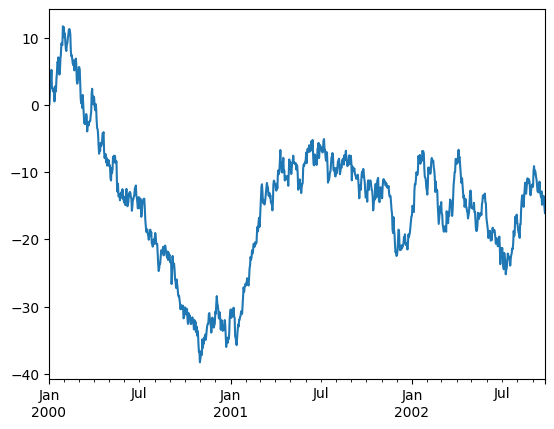

In [165]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 640x480 with 0 Axes>

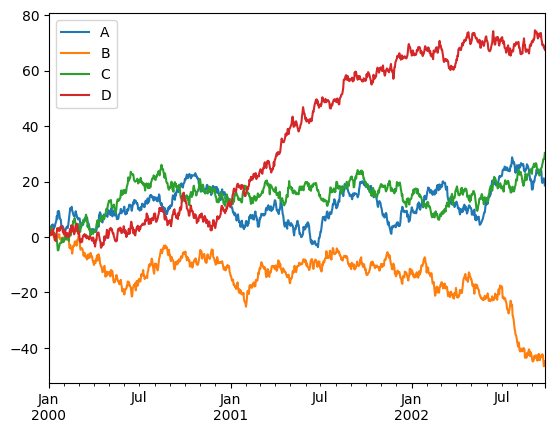

In [167]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

# Importinga and exporting data

### CSV

In [169]:
df = pd.DataFrame(np.random.randint(0, 5, (10, 5)))
df.to_csv('foo.csv')

In [170]:
pd.read_csv("foo.csv")

,Unnamed: 0,0,1,2,3,4
0,0,4,3,4,4,1
1,1,3,1,4,0,0
2,2,2,2,1,2,4
3,3,0,1,0,1,1
4,4,4,3,2,1,1
5,5,4,0,4,0,3
6,6,2,2,0,1,3
7,7,0,4,4,0,4
8,8,0,4,3,2,0
9,9,4,3,0,4,1


### Parquet

In [171]:
df.to_parquet("foo.parquet")

In [172]:
pd.read_parquet("foo.parquet")

,0,1,2,3,4
0,4,3,4,4,1
1,3,1,4,0,0
2,2,2,1,2,4
3,0,1,0,1,1
4,4,3,2,1,1
5,4,0,4,0,3
6,2,2,0,1,3
7,0,4,4,0,4
8,0,4,3,2,0
9,4,3,0,4,1


### Excel

In [174]:
!pip install openpyxl

  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)


In [175]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [176]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,0,1,2,3,4
0,0,4,3,4,4,1
1,1,3,1,4,0,0
2,2,2,2,1,2,4
3,3,0,1,0,1,1
4,4,4,3,2,1,1
5,5,4,0,4,0,3
6,6,2,2,0,1,3
7,7,0,4,4,0,4
8,8,0,4,3,2,0
9,9,4,3,0,4,1
